# Predictive modeling pipeline

## First model with scikitlearn

### Load our data

In [1]:
import pandas as pd

In [2]:
adult_census = pd.read_csv("datasets/adult-census-numeric.csv")

In [3]:
adult_census.head()

,age,capital-gain,capital-loss,hours-per-week,class
0,41,0,0,92,<=50K
1,48,0,0,40,<=50K
2,60,0,0,25,<=50K
3,37,0,0,45,<=50K
4,73,3273,0,40,<=50K


In [4]:
target_name = "class"
target = adult_census[target_name]

In [5]:
data = adult_census.drop(columns=[target_name]) # data = X = features

In [6]:
data.head()

,age,capital-gain,capital-loss,hours-per-week
0,41,0,0,92
1,48,0,0,40
2,60,0,0,25
3,37,0,0,45
4,73,3273,0,40


In [7]:
data.shape

(39073, 4)

### Fit a model and make predictions

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
model = KNeighborsClassifier()

In [12]:
_ = model.fit(data, target)

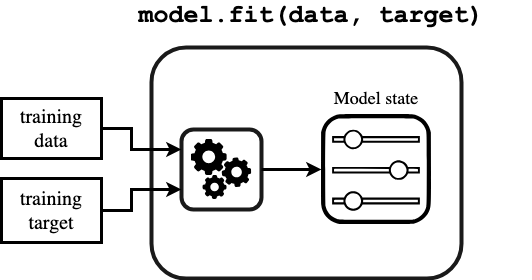

In [13]:
target_predicted = model.predict(data)

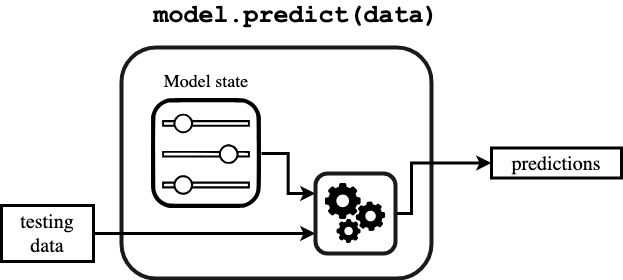

In [14]:
target_predicted[:5]

array([' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K'], dtype=object)

In [15]:
target[:5]

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: class, dtype: object

In [16]:
(target == target_predicted).mean()

0.8219486602001382

### Evaluate on test data

In [17]:
adult_census_test = pd.read_csv('datasets/adult-census-numeric-test.csv')

In [19]:
adult_census_test['class']

0        <=50K
1         >50K
2         >50K
3        <=50K
4        <=50K
         ...  
9764     <=50K
9765      >50K
9766     <=50K
9767     <=50K
9768     <=50K
Name: class, Length: 9769, dtype: object

In [18]:
target_test = adult_census_test[target_name] # get the column 'class'
data_test = adult_census_test.drop(columns=[target_name]) # drop the column 'class'

In [20]:
data_test.shape

(9769, 4)

In [21]:
model.score(data_test, target_test)

0.80202681953117

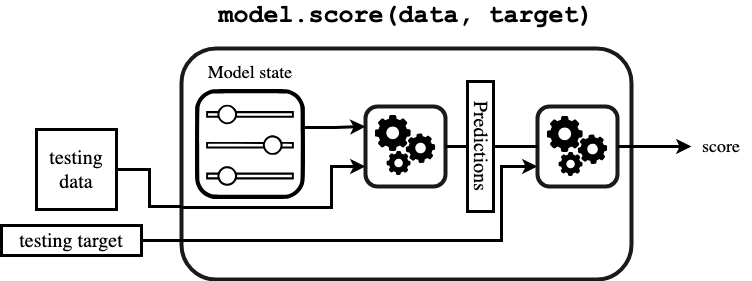

In [22]:
model.predict(data_test)

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [23]:
target_test

0        <=50K
1         >50K
2         >50K
3        <=50K
4        <=50K
         ...  
9764     <=50K
9765      >50K
9766     <=50K
9767     <=50K
9768     <=50K
Name: class, Length: 9769, dtype: object

In [24]:
model.fit

<bound method KNeighborsClassifier.fit of KNeighborsClassifier()>

In [25]:
model.predict
model.score

<bound method ClassifierMixin.score of KNeighborsClassifier()>

## Working with numerical data
- selecting the subset of columns corresponding to numerical data
- using a scikit-learn helper to separate data into train-test sets
- training and evaluating a linear model: logistic regression

In [26]:
adult_census = pd.read_csv('datasets/adult-census.csv')

In [27]:
adult_census = adult_census.drop(columns="education-num")

In [28]:
adult_census.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [29]:
data, target = adult_census.drop(columns="class"), adult_census["class"]

In [30]:
data.dtypes

age                int64
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [33]:
numerical_columns = ["age", "capital-gain", "capital-loss", "hours-per-week"]

In [34]:
data_numeric = data[numerical_columns]

### Train-test split the dataset

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
data_train, data_test, target_train, target_test = train_test_split(
    data_numeric, target, random_state=42, test_size=0.25)

In [38]:
data_test.shape, data_train.shape

((12211, 4), (36631, 4))

### Logistic Regression
if `0.1 * age + 3.3 * hours-per-week - 15.1 > 0`, predict `high-income`
otherwise predict `low_income`

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model = LogisticRegression()

In [41]:
model.fit(data_train, target_train)

LogisticRegression()

In [43]:
accuracy = model.score(data_test, target_test)

In [44]:
accuracy

0.8070592089099992

### Model fitting with preprocessing

In [45]:
data_train.describe()

,age,capital-gain,capital-loss,hours-per-week
count,36631.000000,36631.000000,36631.000000,36631.000000
mean,38.642352,1087.077721,89.665311,40.431247
std,13.725748,7522.692939,407.110175,12.423952
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
scaler.fit(data_train)

StandardScaler()

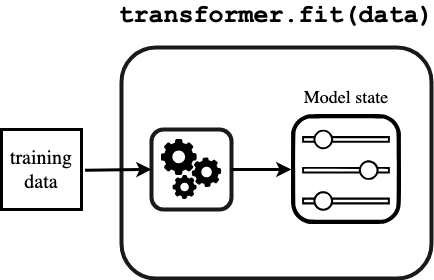

In [49]:
scaler.mean_

array([  38.64235211, 1087.07772106,   89.6653108 ,   40.43124676])

In [50]:
scaler.scale_

array([  13.72556083, 7522.59025606,  407.10461772,   12.42378265])

In [51]:
data_train_scaled = scaler.transform(data_train)

In [52]:
data_train_scaled

array([[ 0.17177061, -0.14450843,  5.71188483, -2.28845333],
       [ 0.02605707, -0.14450843, -0.22025127, -0.27618374],
       [-0.33822677, -0.14450843, -0.22025127,  0.77019645],
       ...,
       [-0.77536738, -0.14450843, -0.22025127, -0.03471139],
       [ 0.53605445, -0.14450843, -0.22025127, -0.03471139],
       [ 1.48319243, -0.14450843, -0.22025127, -2.69090725]])

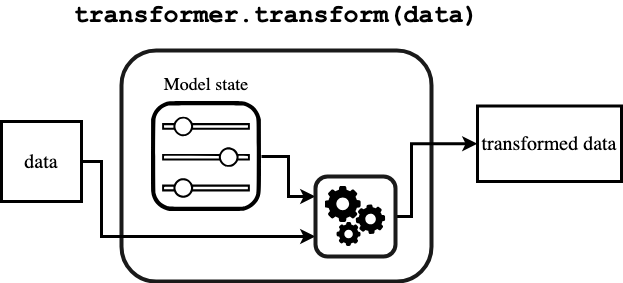
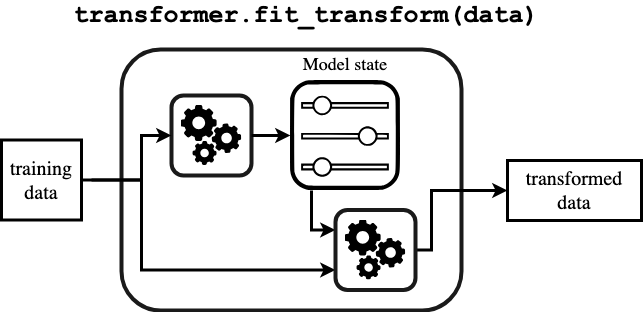

In [53]:
data_train_scaled = scaler.fit_transform(data_train)

In [61]:
type(data_train)

pandas.core.frame.DataFrame

In [59]:
type(data_train_scaled)

numpy.ndarray

In [54]:
from sklearn.pipeline import make_pipeline

In [55]:
model = make_pipeline(StandardScaler(), LogisticRegression())

In [56]:
model.fit(data_train, target_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

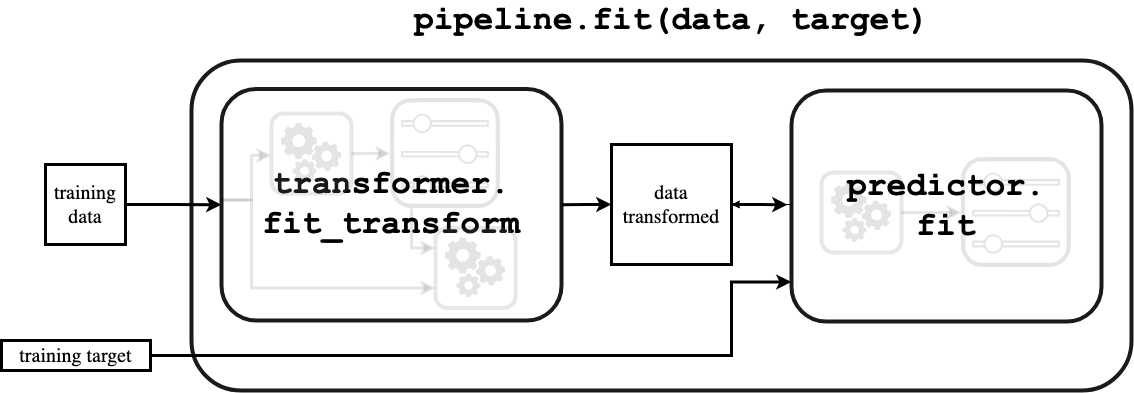

In [62]:
predicted_target = model.predict(data_test)

In [63]:
predicted_target

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

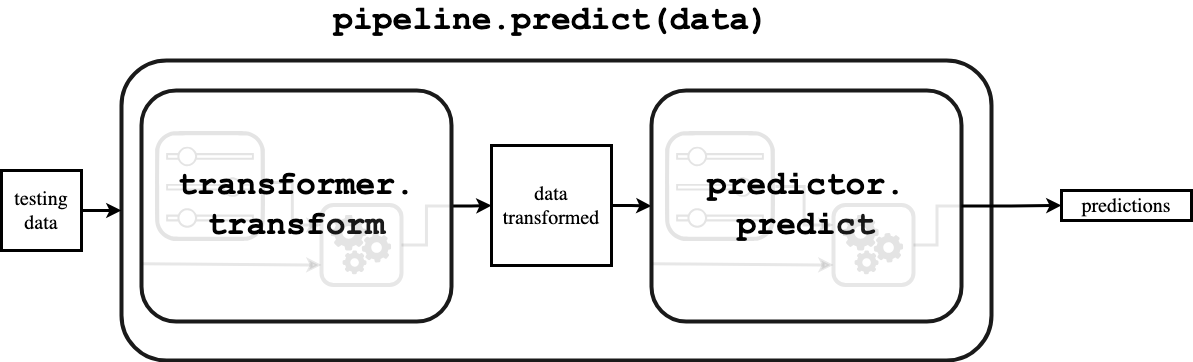

In [64]:
model.score(data_test, target_test)

0.8071411022848252

### Cross-validation

In [65]:
from sklearn.model_selection import cross_validate

In [66]:
cv_result = cross_validate(model, data_numeric, target, cv=5)

In [67]:
cv_result

{'fit_time': array([0.04528999, 0.04205394, 0.04174709, 0.0410769 , 0.04096007]),
 'score_time': array([0.01008511, 0.00914192, 0.00914598, 0.00902104, 0.00918603]),
 'test_score': array([0.79557785, 0.80049135, 0.79965192, 0.79873055, 0.80436118])}

In [ ]:
cv_result